# Chapter 3: Masses and centroids

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the data from chapter1.csv
data_path = "../data/chapter1.csv"
df = pd.read_csv(data_path)

In [3]:
# Set 'Country' as the index to facilitate analysis
df.set_index('Country', inplace=True)

In [4]:
# Calculate Row Profiles (Profile Table with Row Sums Normalized to 1)
def calculate_row_profiles(df):
    """
    Calculates the row profiles by normalizing each row.
    The row profile represents the frequency distribution of each category within a row.
    
    Parameters:
    df (DataFrame): The original frequency table.

    Returns:
    DataFrame: A DataFrame containing the row profiles with an additional row for the average.
    """
    row_profiles = df.div(df.sum(axis=1), axis=0)
    
    # Calculate total sums to determine the overall proportions
    total_sum = df.sum().sum()
    profile_mean = df.sum() / total_sum
    
    # Add the profile mean as a new row
    row_profiles.loc['Average'] = profile_mean
    return row_profiles.round(2)

In [5]:
# Calculate Column Profiles (Profile Table with Column Sums Normalized to 1)
def calculate_column_profiles(df):
    """
    Calculates the column profiles by normalizing each column.
    The column profile represents the frequency distribution of each category within a column.
    
    Parameters:
    df (DataFrame): The original frequency table.

    Returns:
    DataFrame: A DataFrame containing the column profiles with an additional column for the average.
    """
    # Normalize each column by dividing by the column sum
    column_profiles = df.div(df.sum(axis=0), axis=1)
    
    # Calculate the average for each country profile (sum of each row divided by the total sum of the table)
    total_sum = df.sum().sum()
    profile_mean = df.sum(axis=1) / total_sum
    
    # Add the profile mean as a new column (this represents the global proportion of each country)
    column_profiles['Average'] = profile_mean
    
    return column_profiles.round(2)

In [6]:
# Calculate and display Row Profiles (Profiles with Row Means)
row_profiles = calculate_row_profiles(df)
print("Row Profiles with Row Average:")
print(row_profiles)

Row Profiles with Row Average:
                Holiday  Half-Day Work  Full-Day Work
Country                                              
Norway             0.33           0.06           0.61
Canada             0.07           0.20           0.73
Greece             0.14           0.86           0.00
France/Germany     0.08           0.08           0.83
Average            0.15           0.36           0.49


In [7]:
# Calculate and display Column Profiles (Profiles with Column Means)
column_profiles = calculate_column_profiles(df)
print("\nColumn Profiles with Column Average:")
print(column_profiles)


Column Profiles with Column Average:
                Holiday  Half-Day Work  Full-Day Work  Average
Country                                                       
Norway             0.46           0.03           0.26     0.21
Canada             0.08           0.10           0.26     0.17
Greece             0.31           0.81           0.00     0.34
France/Germany     0.15           0.06           0.48     0.28


Create 'Image 2.3: Row Profiles Positions':

In [8]:
# Define the relative path to the CSV file
data_path = "../data/chapter1.csv"

# Load the data into a DataFrame
df = pd.read_csv(data_path)

In [9]:
# Set 'Country' as the index to facilitate table readability
df.set_index('Country', inplace=True)

In [10]:
# Use the provided function to calculate the row profiles
df_profiles = calculate_row_profiles(df)

# Extract data for 3D plotting, excluding the 'Average' row
x = df_profiles.loc[df_profiles.index != 'Average', 'Full-Day Work']
y = df_profiles.loc[df_profiles.index != 'Average', 'Half-Day Work']
z = df_profiles.loc[df_profiles.index != 'Average', 'Holiday']

# Extract the row average separately for a different marker
x_avg = df_profiles.loc['Average', 'Full-Day Work']
y_avg = df_profiles.loc['Average', 'Half-Day Work']
z_avg = df_profiles.loc['Average', 'Holiday']

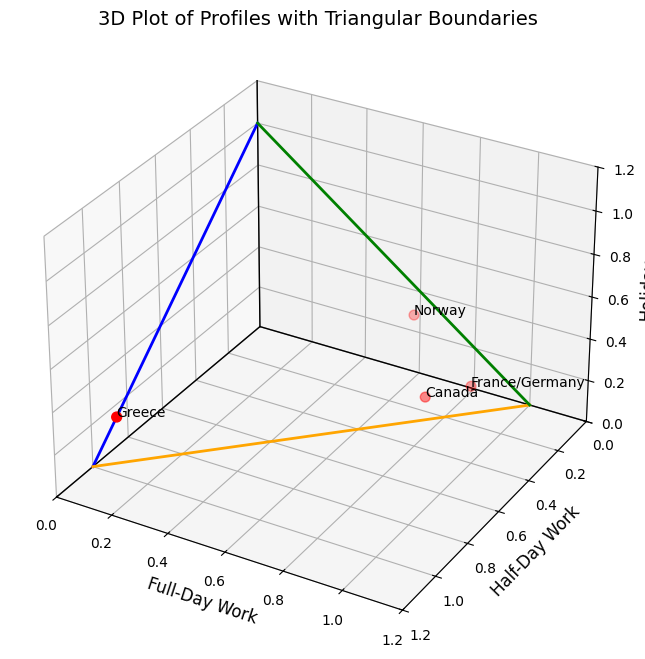

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulated data for `profiles` (assuming it is similar to what you used in R)
data = {
    'Holiday': [0.33, 0.07, 0.14, 0.08],
    'Half-Day Work': [0.06, 0.20, 0.86, 0.08],
    'Full-Day Work': [0.61, 0.73, 0.00, 0.83]
}
profiles = pd.DataFrame(data, index=['Norway', 'Canada', 'Greece', 'France/Germany'])

# Create figure and a 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extend axes lines beyond the usual range
ax.plot([0, 1.2], [0, 0], [0, 0], color='black', linestyle='-', linewidth=1)  # X-axis
ax.plot([0, 0], [0, 1.2], [0, 0], color='black', linestyle='-', linewidth=1)  # Y-axis
ax.plot([0, 0], [0, 0], [0, 1.2], color='black', linestyle='-', linewidth=1)  # Z-axis

# Draw lines forming a triangle in the 3D plane
ax.plot([0, 0], [0, 1], [1, 0], color='blue', linewidth=2)  # Line 1
ax.plot([0, 1], [1, 0], [0, 0], color='orange', linewidth=2)  # Line 2
ax.plot([0, 1], [0, 0], [1, 0], color='green', linewidth=2)  # Line 3

# Plot the points of the profiles
ax.scatter(profiles['Full-Day Work'], profiles['Half-Day Work'], profiles['Holiday'], color='red', s=50)

# Add labels to the points
for idx, country in enumerate(profiles.index):
    x, y, z = profiles.loc[country, ['Full-Day Work', 'Half-Day Work', 'Holiday']]
    ax.text(x, y, z, country, fontsize=10, color='black')

# Set labels for each axis
ax.set_xlabel('Full-Day Work', fontsize=12)
ax.set_ylabel('Half-Day Work', fontsize=12)
ax.set_zlabel('Holiday', fontsize=12)

# Set axis limits to make the 3D plot area more defined
ax.set_xlim(0, 1.2)
ax.set_ylim(1.2, 0)
ax.set_zlim(0, 1.2)

# Set title and show plot
plt.title('3D Plot of Profiles with Triangular Boundaries', fontsize=14)
plt.show()

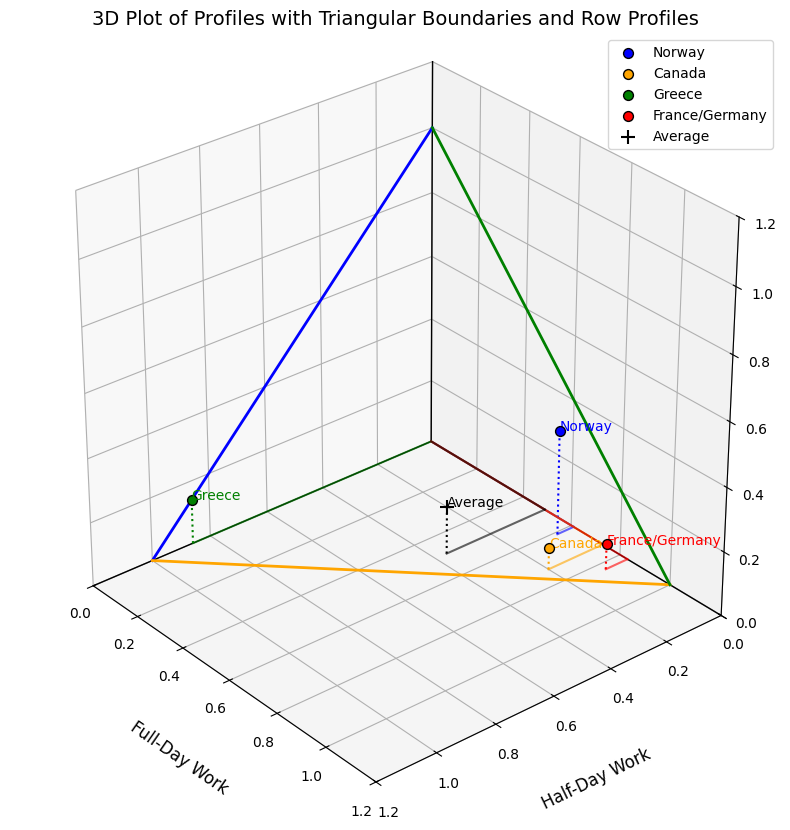

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the relative path to the CSV file
data_path = "../data/chapter1.csv"

# Load the data into a DataFrame
df = pd.read_csv(data_path)

# Set 'Country' as the index to facilitate table readability
df.set_index('Country', inplace=True)

# Use the provided function to calculate the row profiles
def calculate_row_profiles(df):
    row_profiles = df.div(df.sum(axis=1), axis=0)
    # Calculate total sums to determine the overall proportions
    total_sum = df.sum().sum()
    profile_mean = df.sum() / total_sum
    # Add the profile mean as a new row
    row_profiles.loc['Average'] = profile_mean
    return row_profiles.round(2)

# Calculate row profiles using the provided function
df_profiles = calculate_row_profiles(df)

# Extract data for 3D plotting, excluding the 'Average' row
x = df_profiles.loc[df_profiles.index != 'Average', 'Full-Day Work']
y = df_profiles.loc[df_profiles.index != 'Average', 'Half-Day Work']
z = df_profiles.loc[df_profiles.index != 'Average', 'Holiday']

# Extract the row average separately for a different marker
x_avg = df_profiles.loc['Average', 'Full-Day Work']
y_avg = df_profiles.loc['Average', 'Half-Day Work']
z_avg = df_profiles.loc['Average', 'Holiday']

# Create a figure and a 3D axis
fig = plt.figure(figsize=(14, 10))  # Adjust figure size to allow more space for labels and elements
ax = fig.add_subplot(111, projection='3d')

# Colors for each country for consistent plotting
colors = ['blue', 'orange', 'green', 'red']

# Extend axes lines beyond the usual range to emphasize axis visibility
ax.plot([0, 1.2], [0, 0], [0, 0], color='black', linestyle='-', linewidth=1)  # X-axis
ax.plot([0, 0], [0, 1.2], [0, 0], color='black', linestyle='-', linewidth=1)  # Y-axis
ax.plot([0, 0], [0, 0], [0, 1.2], color='black', linestyle='-', linewidth=1)  # Z-axis

# Draw lines forming a triangle in the 3D plane
ax.plot([0, 0], [0, 1], [1, 0], color='blue', linewidth=2)  # Line 1
ax.plot([0, 1], [1, 0], [0, 0], color='orange', linewidth=2)  # Line 2
ax.plot([0, 1], [0, 0], [1, 0], color='green', linewidth=2)  # Line 3

# Plot each country profile in the 3D space, excluding 'Average'
for idx, country in enumerate(df_profiles.index):
    if country != 'Average':
        # Scatter plot of the actual point in the 3D space
        ax.scatter(x[country], y[country], z[country], label=country, color=colors[idx], s=50, edgecolor='black')

        # Draw the "cateto" lines (orthogonal projections on the floor plane)
        ax.plot([0, x[country]], [0, 0], [0, 0], linestyle='-', color=colors[idx], alpha=0.6)  # Cateto along Full-Day Work axis
        ax.plot([x[country], x[country]], [0, y[country]], [0, 0], linestyle='-', color=colors[idx], alpha=0.6)  # Cateto along Half-Day Work axis
        ax.plot([x[country], x[country]], [y[country], y[country]], [0, z[country]], linestyle=':', color=colors[idx])  # Vertical projection line

        # Add the country name as a label next to each point
        ax.text(x[country], y[country], z[country], country, color=colors[idx], fontsize=10)

# Plot the 'Average' row as a separate point with a different marker
ax.scatter(x_avg, y_avg, z_avg, color='black', marker='+', s=100, label='Average')
ax.text(x_avg, y_avg, z_avg, 'Average', color='black', fontsize=10)

# Draw the "cateto" lines for the Average point
ax.plot([0, x_avg], [0, 0], [0, 0], linestyle='-', color='black', alpha=0.6)
ax.plot([x_avg, x_avg], [0, y_avg], [0, 0], linestyle='-', color='black', alpha=0.6)
ax.plot([x_avg, x_avg], [y_avg, y_avg], [0, z_avg], linestyle=':', color='black')

# Set labels for each axis with adjusted labelpad for visibility
ax.set_xlabel('Full-Day Work', fontsize=12, labelpad=20)
ax.set_ylabel('Half-Day Work', fontsize=12, labelpad=20)
ax.set_zlabel('Holiday', fontsize=12, labelpad=20, rotation=90)

# Set axis limits to make the 3D plot area more defined
ax.set_xlim(0, 1.2)
ax.set_ylim(1.2, 0)
ax.set_zlim(0, 1.2)

# Reduce the box aspect ratio to make the cube smaller inside the figure
ax.set_box_aspect([1, 1, 1])

# Set the title of the plot
ax.set_title('3D Plot of Profiles with Triangular Boundaries and Row Profiles', fontsize=14)

# Set view angle to adjust visibility of all axes
ax.view_init(elev=30, azim=-40)

# Show the legend
ax.legend()

# Show the plot
plt.show()